<a href="https://colab.research.google.com/github/flyinacres/fastai-coursework/blob/main/collab_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# installing/upgrading fastai2
!pip install --upgrade fastai

from fastai.vision.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00


In [3]:
%matplotlib inline
from fastai.tabular.all import *
from fastai.collab import *

In [4]:
path = untar_data(URLs.ML_100k)

In [5]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      usecols=(0,1,2), names=['user','movie','rating'])
ratings.head()

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [6]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [8]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)

In [9]:
dls.show_batch()

,user,title,rating
0,288,Koyaanisqatsi (1983),4
1,276,Ran (1985),4
2,394,So I Married an Axe Murderer (1993),3
3,862,Event Horizon (1997),5
4,796,Arsenic and Old Lace (1944),3
5,229,Washington Square (1997),4
6,255,Mimic (1997),2
7,345,Mars Attacks! (1996),3
8,592,Leaving Las Vegas (1995),5
9,246,Young Guns II (1990),3


In [10]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [11]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.942214,0.943894,00:18
1,0.853419,0.873200,00:10
2,0.734461,0.823098,00:10
3,0.585765,0.811598,00:10
4,0.498663,0.812359,00:10


Nice to actually get a learner running on Colab again, after all the challenges with the text examples...

In [12]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)'],
      dtype=object)

In [13]:
movie_bias = learn.model.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

mean_ratings is a Pandas Series--a one dimensional ndarray with axis labels.

ratings is a Pandas DataFrame, a table.  In this case with numeric indicees

movie ratings is a list

In [14]:
mean_ratings = ratings.groupby('title')['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

https://www.w3schools.com/python/python_lambda.asp
https://www.geeksforgeeks.org/python-sorted-function/

movie ratings has multiple dimensions, so this ensures it is sorted by the zeroth dimension, which should be the bias

In [15]:
item0 = lambda o:o[0]
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3601),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3335), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.3075),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2864), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2826), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2749), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2610), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2442), 'Hellraiser: Bloodline (1996)', 2.0),
 (tensor(-0.2347), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2282), 'Anaconda (1997)', 2.289473684210526),
 (tensor(-0.2251), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2213), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2198), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.2189), 'Spice World (1997)', 2.1153846153846154),
 (tensor(-0.2147), 'Grea

In [16]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.5605), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.5408), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5345), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5210), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5164), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5063), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5036), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4966), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4907), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.4665), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4634), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4609), 'To Kill a Mockingbird (1962)', 4.292237442922374),
 (tensor(0.4546), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4477), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4465), 'Wrong Trousers, The (1993)', 4.466101694915254)]

In [17]:
??ratings

In [18]:
mean_ratings.shape

(1664,)

In [19]:
mean_ratings[:10]

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
Name: rating, dtype: float64

In [20]:
??mean_ratings

In [21]:
movie_w = learn.model.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 50])

In [22]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [23]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [24]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.3256), 'Home Alone 3 (1997)'),
 (tensor(1.2785), 'Congo (1995)'),
 (tensor(1.2493), 'Grease 2 (1982)'),
 (tensor(1.2022), 'Jungle2Jungle (1997)'),
 (tensor(1.1859), 'Leave It to Beaver (1997)'),
 (tensor(1.1706), 'Flipper (1996)'),
 (tensor(1.1247), 'Bio-Dome (1996)'),
 (tensor(1.0870), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.0723), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.0540), 'Turbulence (1997)')]

In [25]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0551), 'Chinatown (1974)'),
 (tensor(-1.0534), 'Ran (1985)'),
 (tensor(-1.0532), 'Close Shave, A (1995)'),
 (tensor(-1.0382), 'Casablanca (1942)'),
 (tensor(-1.0161), 'Secrets & Lies (1996)'),
 (tensor(-1.0071), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-1.0067), 'Third Man, The (1949)'),
 (tensor(-0.9862), "One Flew Over the Cuckoo's Nest (1975)"),
 (tensor(-0.9752), 'Apocalypse Now (1979)'),
 (tensor(-0.9739), 'Godfather, The (1972)')]

In [26]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [27]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2181), 'Titanic (1997)'),
 (tensor(1.1005), 'Braveheart (1995)'),
 (tensor(1.0013), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9177), 'Forrest Gump (1994)'),
 (tensor(0.9011), "It's a Wonderful Life (1946)"),
 (tensor(0.8849), 'Independence Day (ID4) (1996)'),
 (tensor(0.8257), 'Pretty Woman (1990)'),
 (tensor(0.8233), 'American President, The (1995)'),
 (tensor(0.8119), 'Dirty Dancing (1987)'),
 (tensor(0.8111), 'Back to the Future (1985)')]

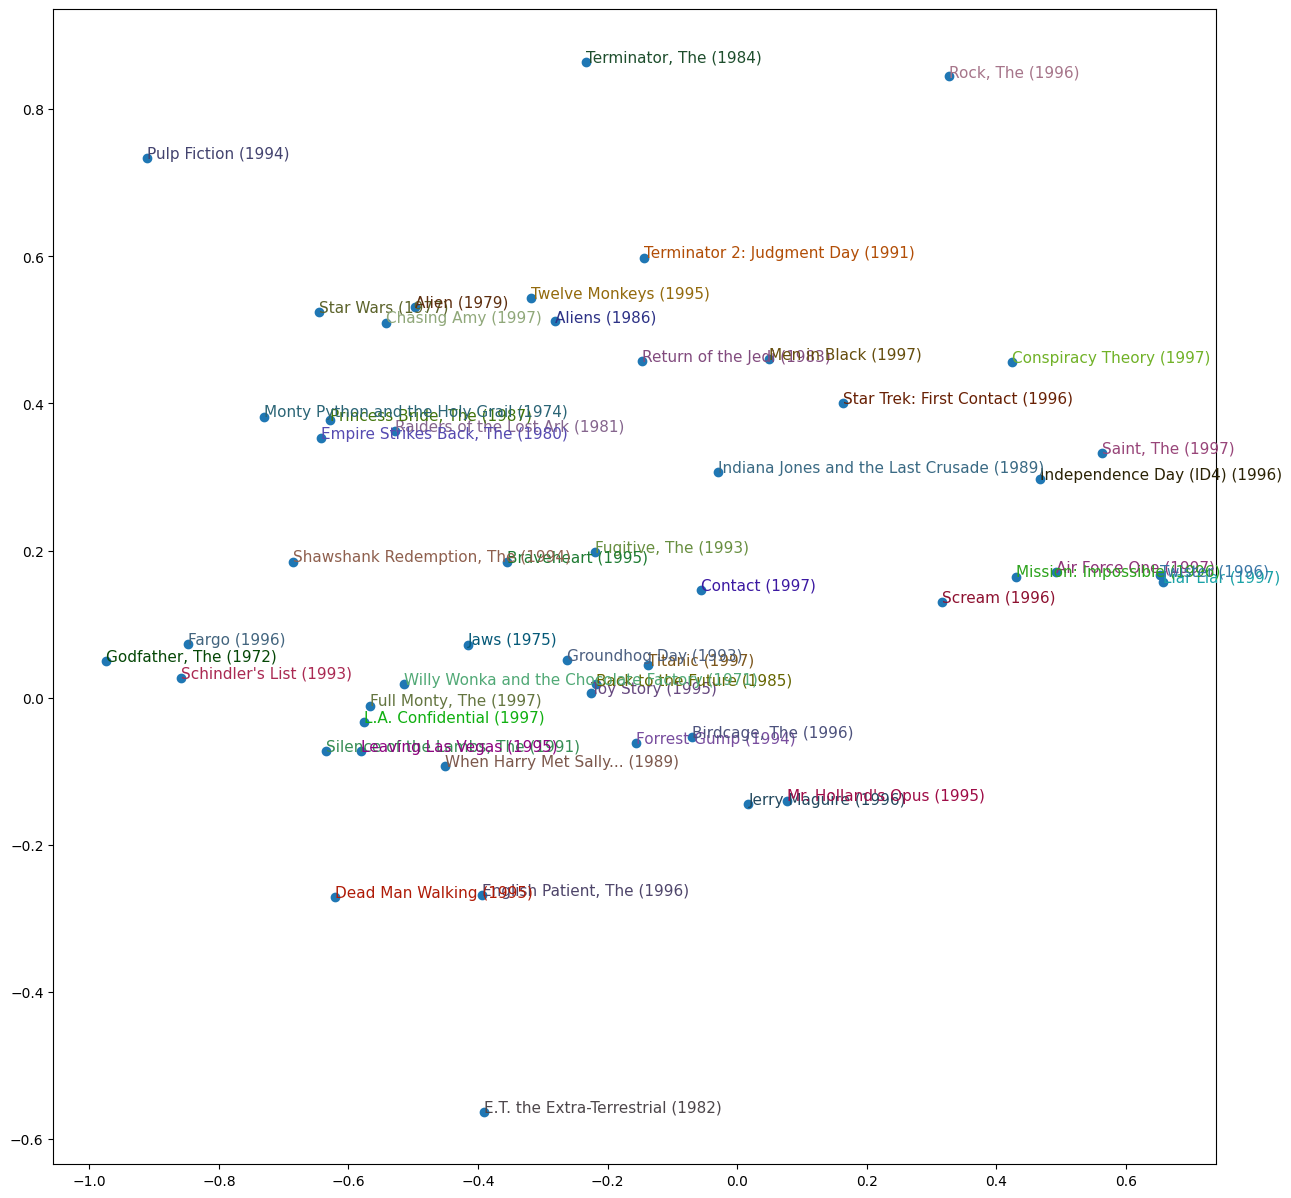

In [28]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()